In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

https://forecastegy.com/posts/xgboost-binary-classification-python/

In [2]:
# Load the data
data = pd.read_csv('D:/!!Research/rgee_test/GEE_LPC/point_data/draft_points.csv')

# Display the first few rows of the data
data.head()

,mesq_pres,b1_soilWater_0,b2_soilWater_10,b3_soilWater_30,b4_soilWater_60,b5_soilWater_100,b6_soilWater_200,b1_sandCont_0,b2_sandCont_10,b3_sandCont_30,...,b1_carbonCont_0,b2_carbonCont_10,b3_carbonCont_30,b4_carbonCont_60,b5_carbonCont_100,b6_carbonCont_200,ann_mean_temp,ann_temp_range,ann_precip,dist_road
0,0,16,16,17,18,18,19,59,59,57,...,1,1,1,0,0,0,160,368,410,324.939688
1,0,16,16,17,17,18,18,57,57,55,...,1,1,1,0,0,0,160,369,414,789.179317
2,0,15,14,16,17,17,17,56,55,53,...,2,1,1,0,0,0,160,369,416,83.484661
3,0,13,12,13,15,15,16,65,63,61,...,2,1,1,1,0,0,161,370,416,548.740335
4,0,18,18,18,19,19,19,54,55,52,...,2,1,1,0,0,0,160,367,410,71.359434


In [172]:
from sklearn.model_selection import train_test_split

# Separate target variable
X = data.drop('mesq_pres', axis=1)
y = data['mesq_pres']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

https://www.youtube.com/watch?v=GrJP9FLV3FE

https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-xgboost

https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27 \
https://notebook.community/slundberg/shap/notebooks/tree_explainer/Census%20income%20classification%20with%20XGBoost

In [173]:
from xgboost import XGBClassifier
stq_model = XGBClassifier(objective='binary:logistic', seed = 42)
stq_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.48174
[1]	validation_0-logloss:0.46414
[2]	validation_0-logloss:0.45402
[3]	validation_0-logloss:0.45663
[4]	validation_0-logloss:0.45879
[5]	validation_0-logloss:0.46004
[6]	validation_0-logloss:0.46584
[7]	validation_0-logloss:0.46445
[8]	validation_0-logloss:0.46952
[9]	validation_0-logloss:0.46803
[10]	validation_0-logloss:0.46998
[11]	validation_0-logloss:0.46862
[12]	validation_0-logloss:0.47054


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

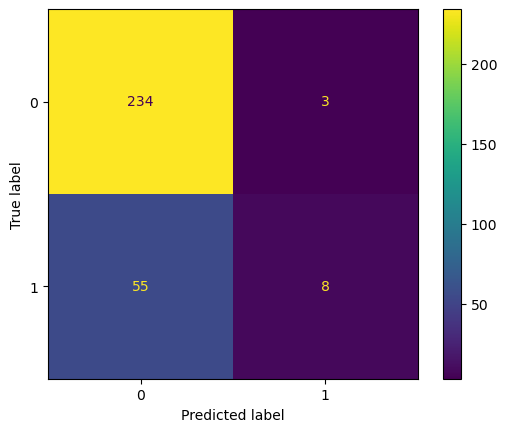

In [174]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model, X_test, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
"""param_grid = {
    "max_depth" : [3, 4, 5],
    "learning_rate" : [0.1, 0.01, 0.05],
    "gamma" : [0, 0.25, 1.0],
    "reg_lambda" : [0, 1.0, 10],
    "scale_pos_weight" : [1, 3, 5],
    "eta": [0.01, 0.05, 0.1]
}

param_grid_2 = {
    "max_depth" : [4],
    "learning_rate" : [0.05],
    "gamma" : [0.25],
    "reg_lambda" : [1],
    "scale_pos_weight" : [5],
    "eta" : [0.001],
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}

optimal_params = GridSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic',
                             seed = 42,
                             subsample = 0.9,
                             colsample_bytree = 0.5),
    param_grid = param_grid_2,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)
"""
optimal_params.fit(X_train, y_train, verbose = False, early_stopping_rounds = 10, eval_metric = 'auc', eval_set = [(X_test, y_test)])
print(optimal_params.best_params_)

In [175]:
stq_model_2 = XGBClassifier(objective='binary:logistic', 
                            seed = 42, 
                            max_depth = 4,
                            learning_rate = 0.05,
                            gamma = 0.25,
                            reg_lambda = 1,
                            scale_pos_weight = 5,
                            eta = 0.001,
                            subsample = 0.5,)
                            #base_score = np.mean(y_train))
stq_model_2.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[0]	validation_0-logloss:0.77103
[1]	validation_0-logloss:0.76030
[2]	validation_0-logloss:0.75230
[3]	validation_0-logloss:0.74530
[4]	validation_0-logloss:0.73242
[5]	validation_0-logloss:0.72496
[6]	validation_0-logloss:0.72062
[7]	validation_0-logloss:0.70871
[8]	validation_0-logloss:0.70032
[9]	validation_0-logloss:0.69597
[10]	validation_0-logloss:0.69006
[11]	validation_0-logloss:0.68598
[12]	validation_0-logloss:0.68531
[13]	validation_0-logloss:0.67659
[14]	validation_0-logloss:0.67316
[15]	validation_0-logloss:0.67065
[16]	validation_0-logloss:0.66738
[17]	validation_0-logloss:0.66426
[18]	validation_0-logloss:0.66381
[19]	validation_0-logloss:0.66037
[20]	validation_0-logloss:0.65605
[21]	validation_0-logloss:0.65292
[22]	validation_0-logloss:0.65047
[23]	validation_0-logloss:0.64400
[24]	validation_0-logloss:0.64038
[25]	validation_0-logloss:0.63718
[26]	validation_0-logloss:0.63404
[27]	validation_0-logloss:0.63283
[28]	validation_0-logloss:0.63143
[29]	validation_0-loglos

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.001, eval_metric=None,
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

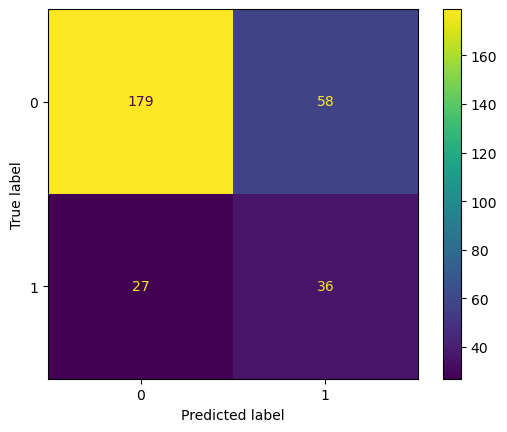

In [176]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(stq_model_2, X_test, y_test)

In [177]:
# Calculate accuracy
accuracy = stq_model_2.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.67%


In [178]:
y_pred = stq_model_2.predict(X_test)
y_pred_proba = stq_model_2.predict_proba(X_test)

In [179]:
from sklearn.metrics import log_loss, roc_auc_score

# Calculate log loss
log_loss(y_test, y_pred_proba)
# Calculate ROC AUC
#roc_auc_score(y_test, y_pred_proba[:,1])

0.5636506214791276

In [180]:
from sklearn.metrics import classification_report
import shap
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       237
           1       0.38      0.57      0.46        63

    accuracy                           0.72       300
   macro avg       0.63      0.66      0.63       300
weighted avg       0.77      0.72      0.73       300



https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137 \
https://christophm.github.io/interpretable-ml-book/shap.html
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

[18:49:55] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[18:49:55] WARNING: D:\bld\xgboost-split_1705650032250\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


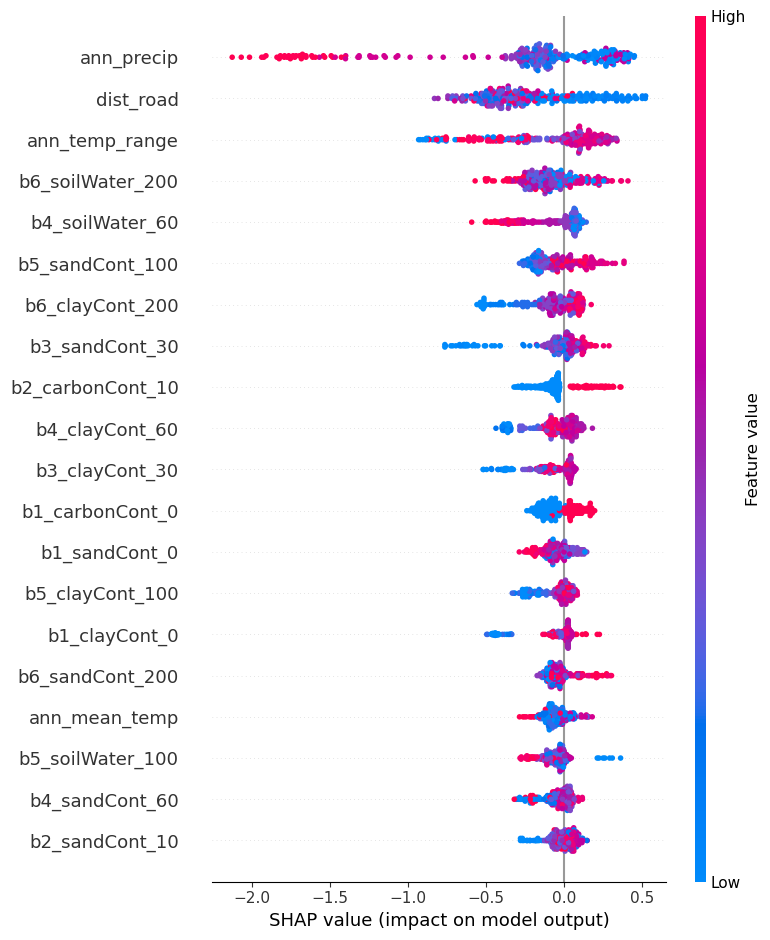

In [190]:
explainer = shap.TreeExplainer(stq_model_2)
shap_values = explainer.shap_values(X_test)
shap.TreeExplainer(stq_model_2).shap_values(X_test)
shap.summary_plot(shap_values, X_test)

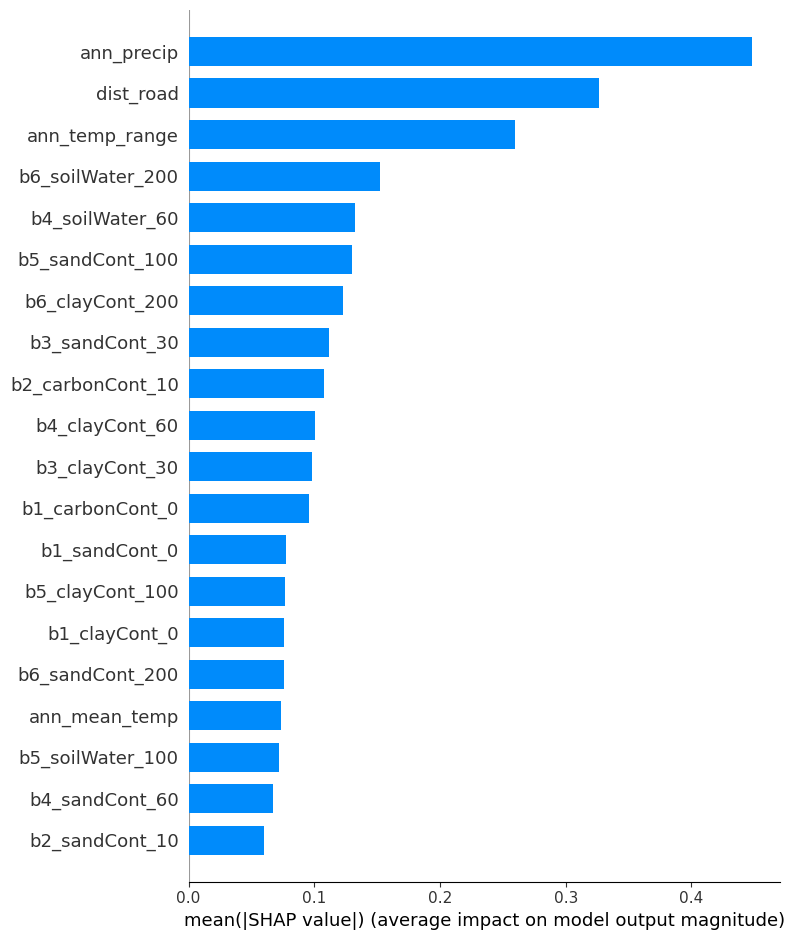

In [182]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [93]:
shap.initjs()

In [183]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [184]:
shap.force_plot(explainer.expected_value, shap_values[:100,:], X_test.iloc[:100,:])

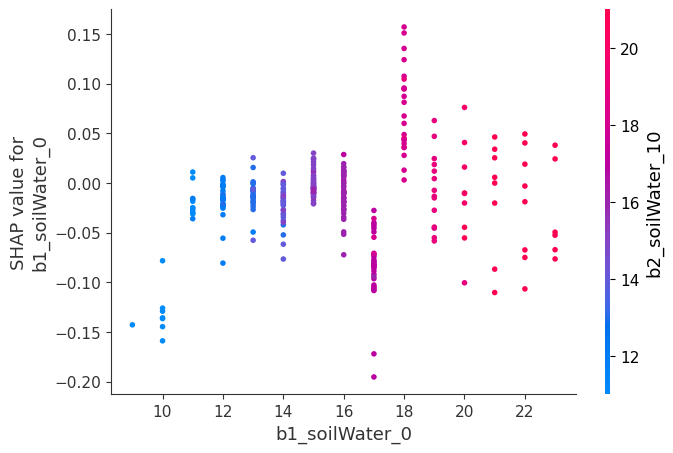

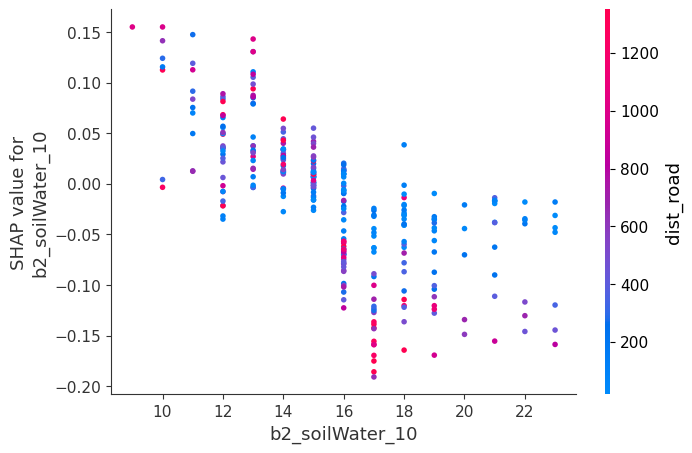

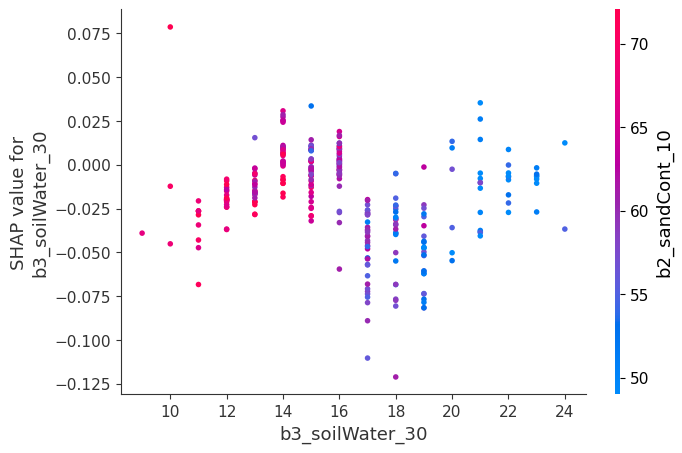

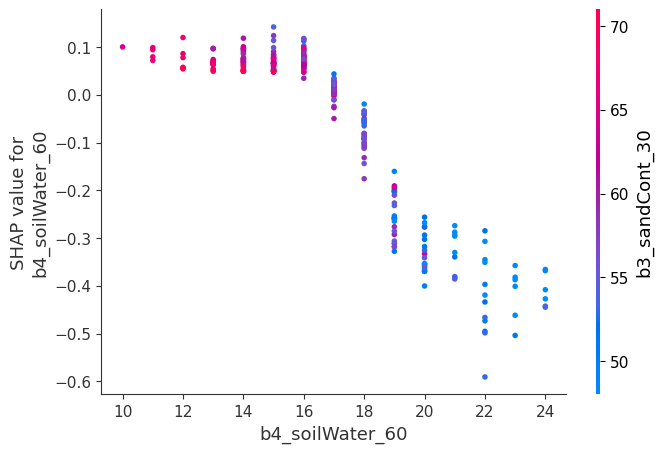

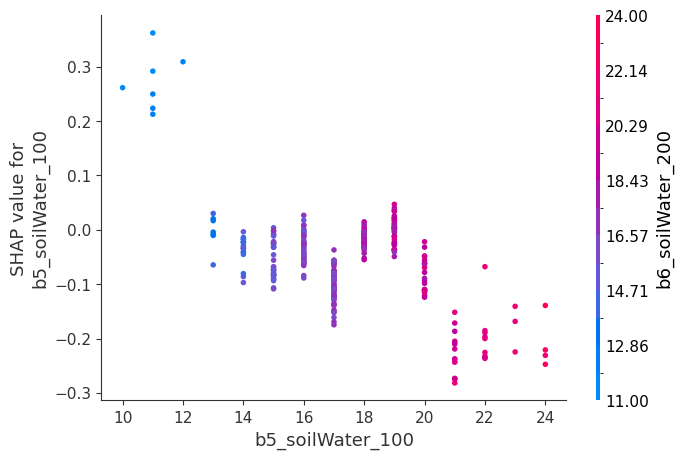

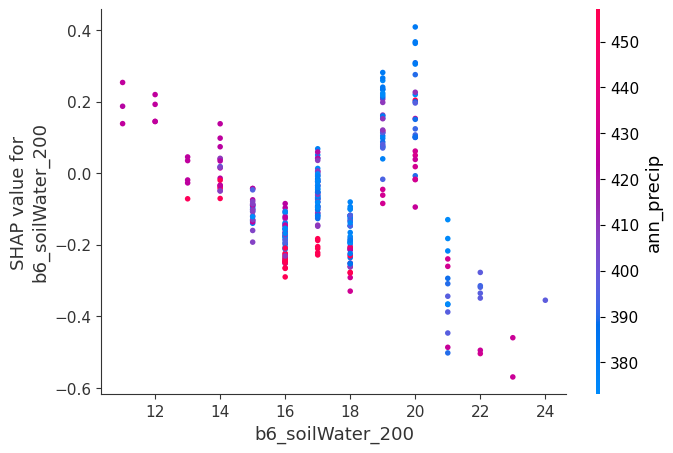

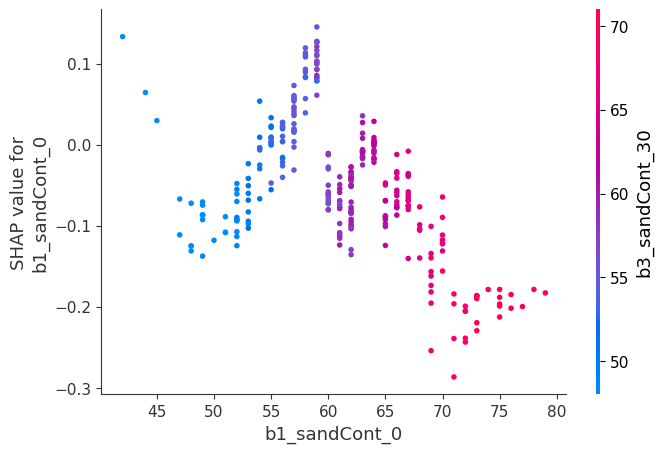

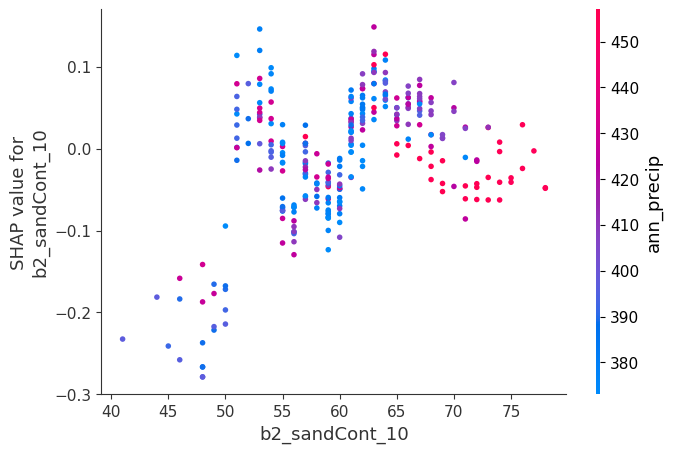

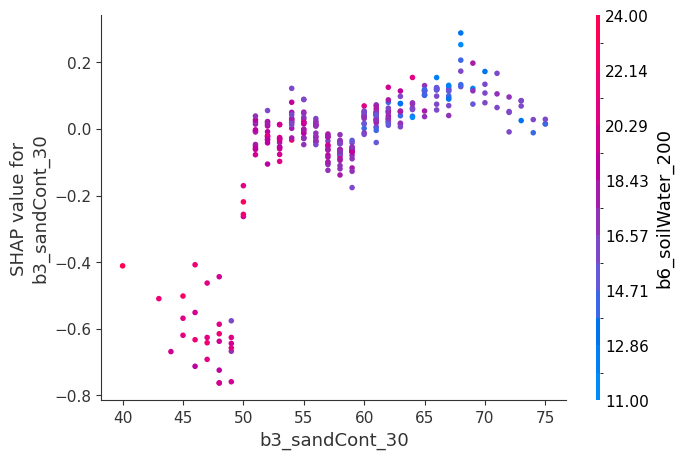

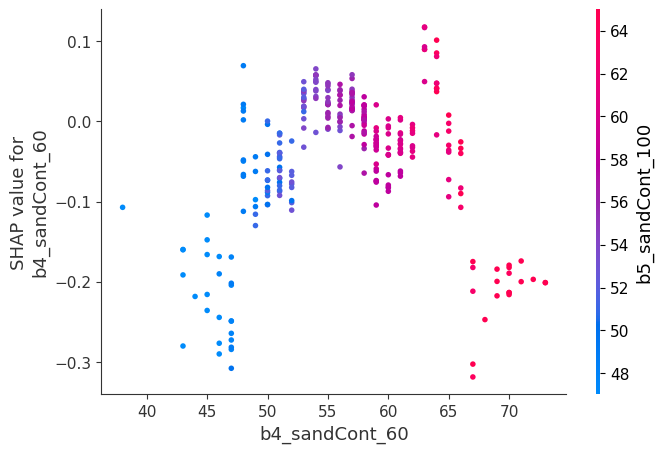

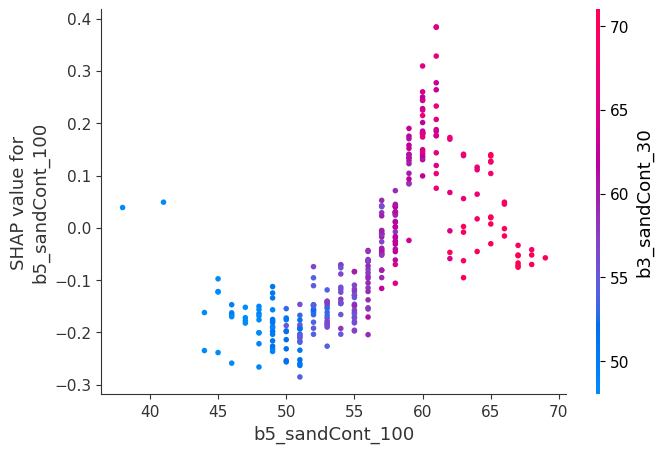

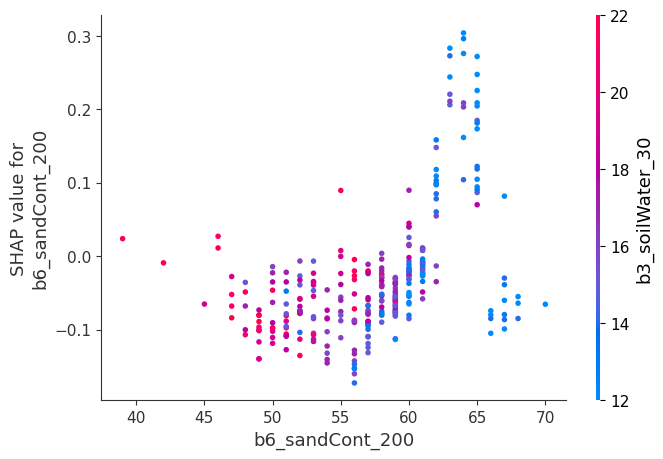

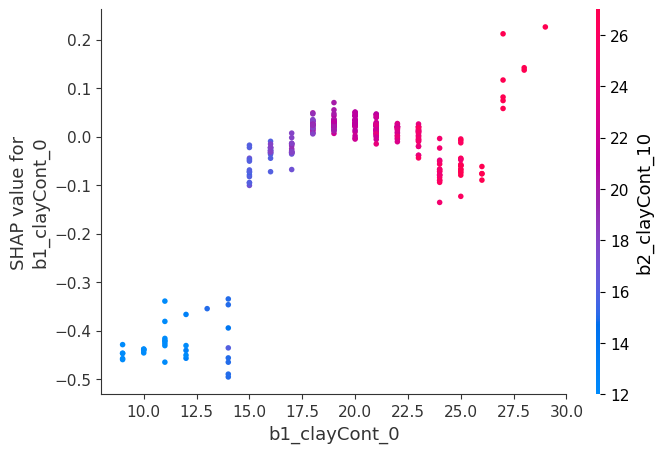

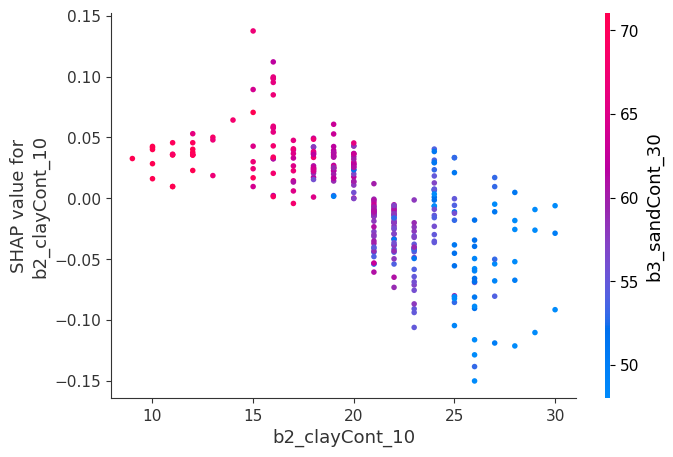

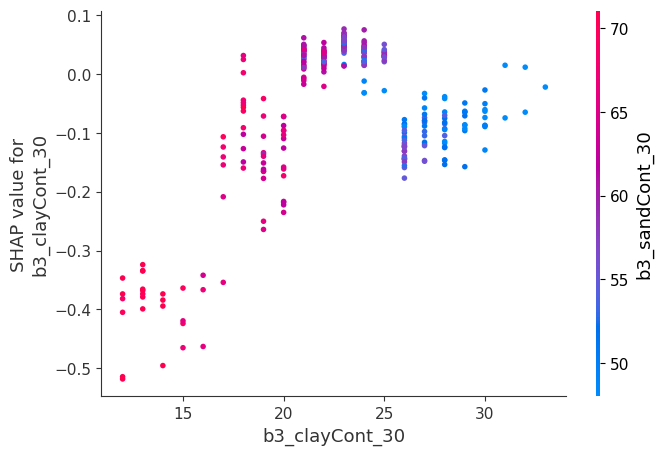

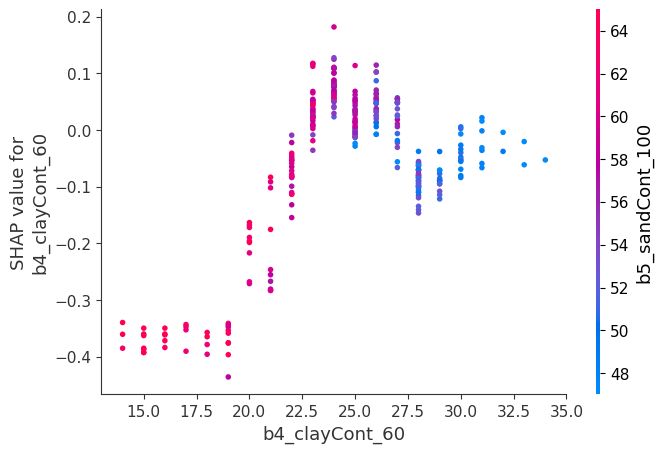

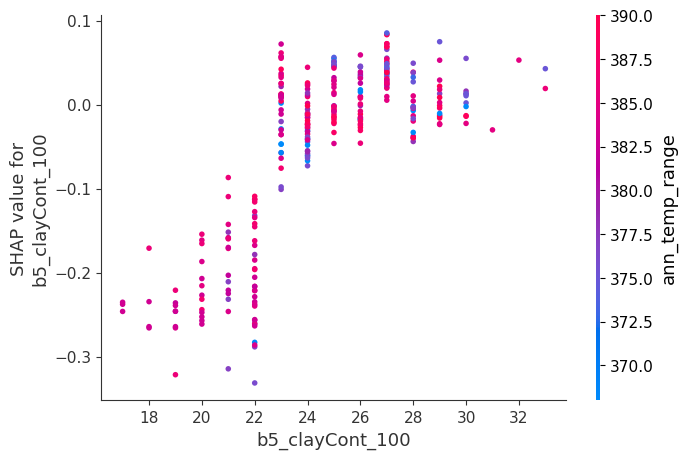

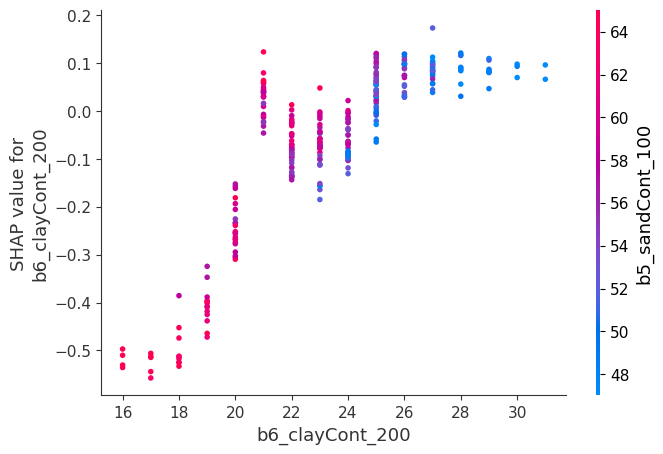

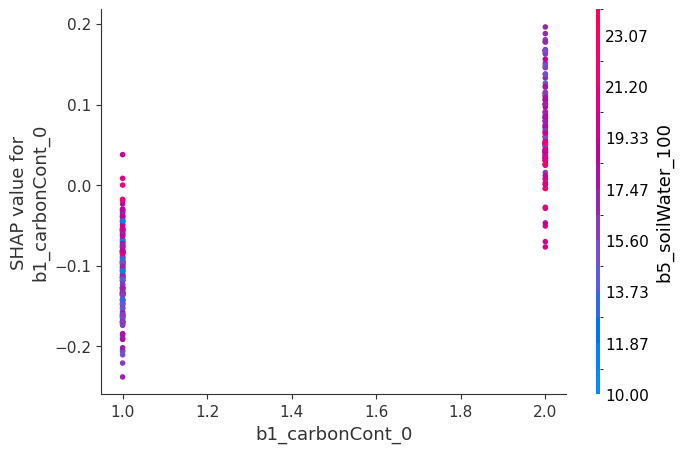

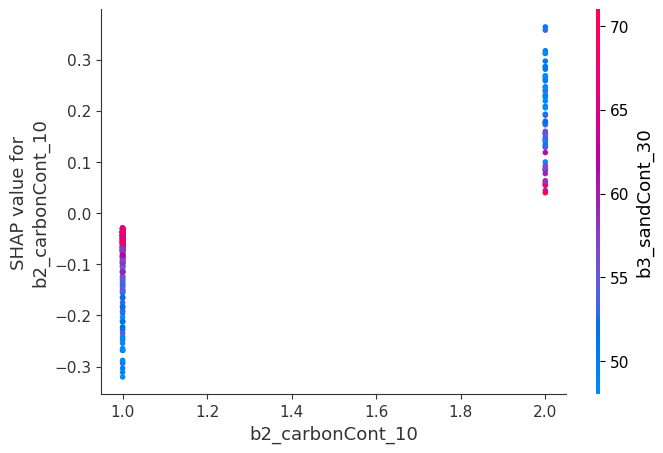

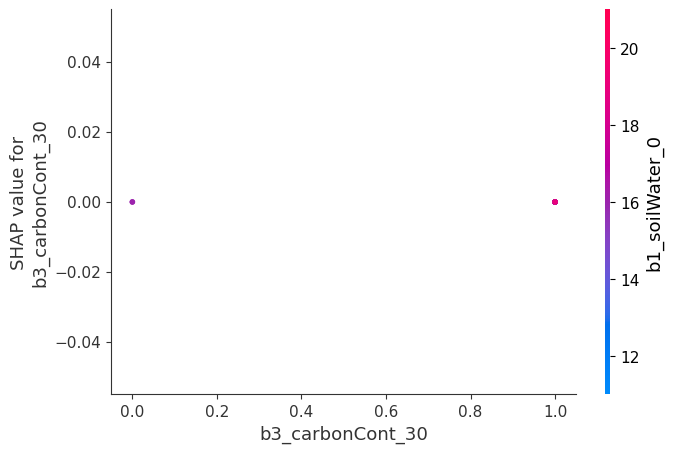

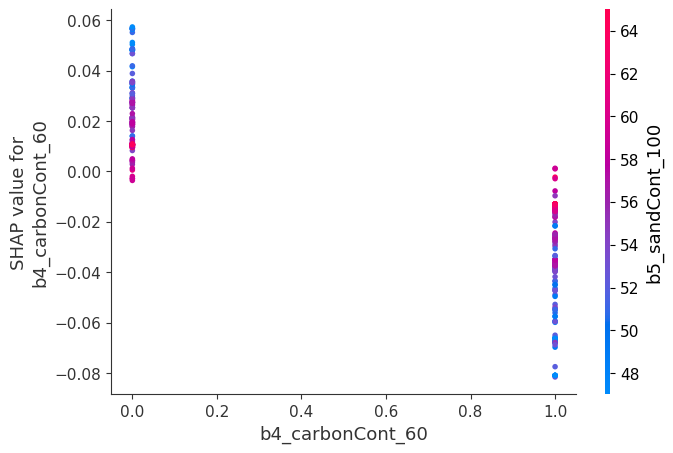

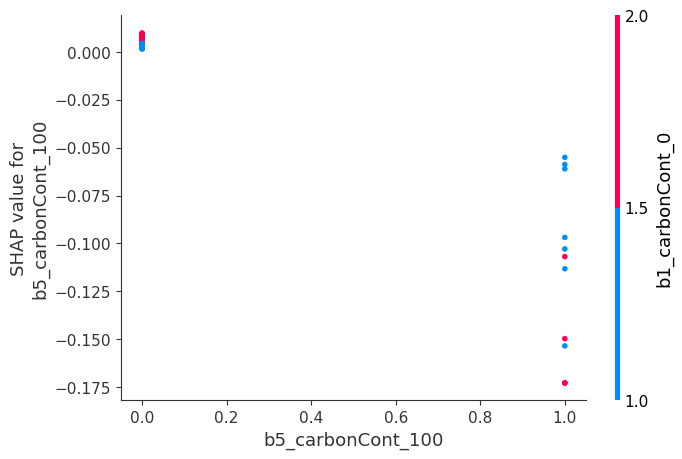

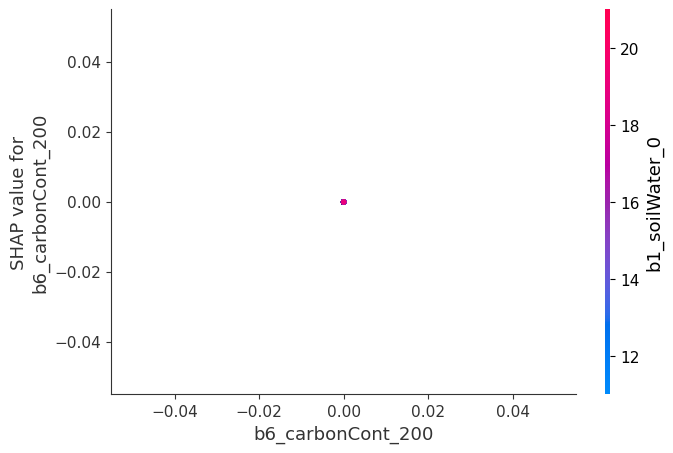

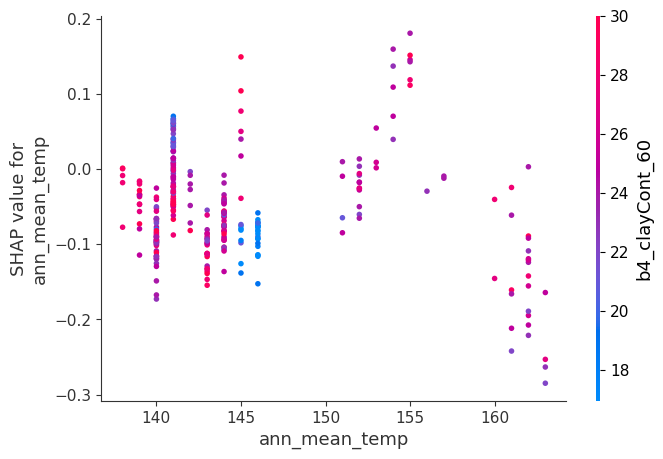

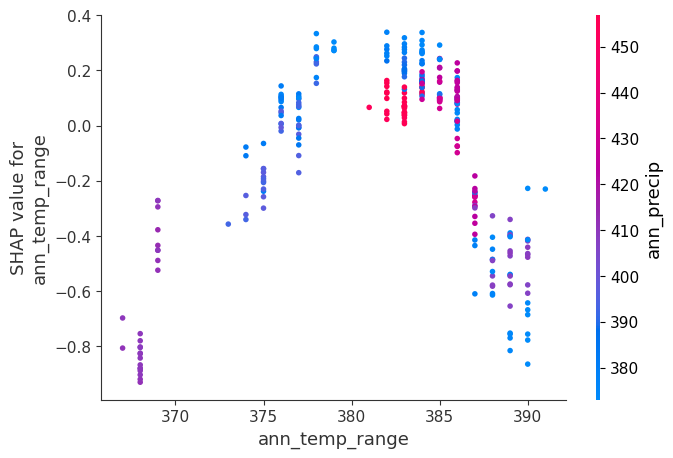

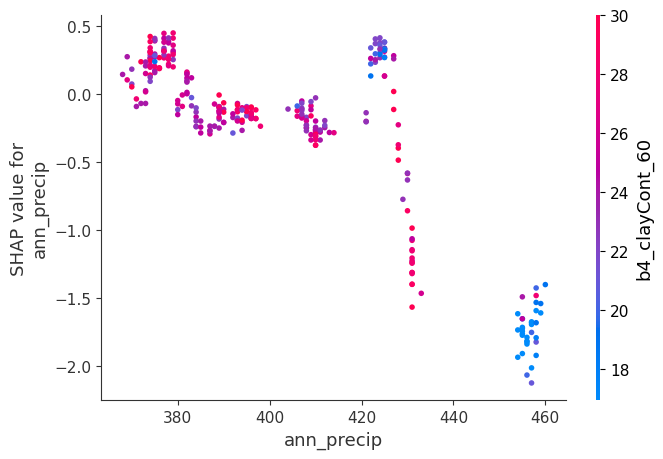

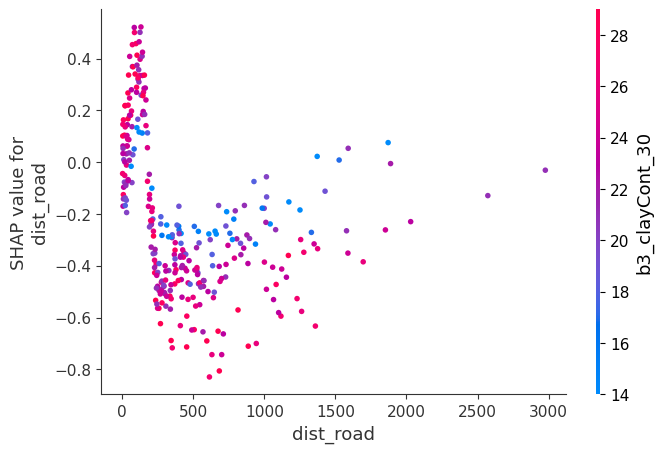

In [185]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_test, display_features=X_test)

In [191]:
explainer.expected_value

0.775821

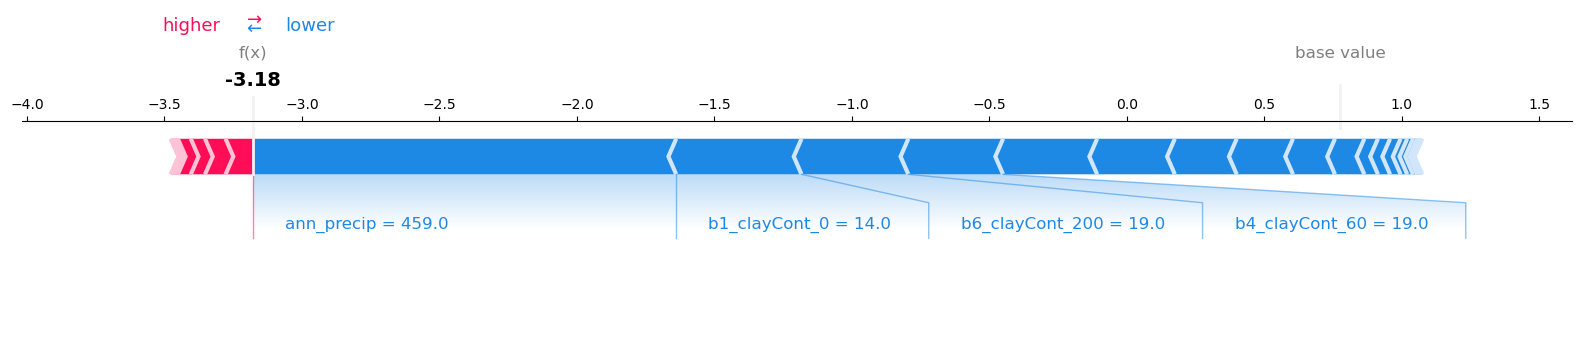

In [187]:
shap.plots.force(explainer.expected_value, shap_values[0,:], X_test.iloc[0, :], matplotlib = True)

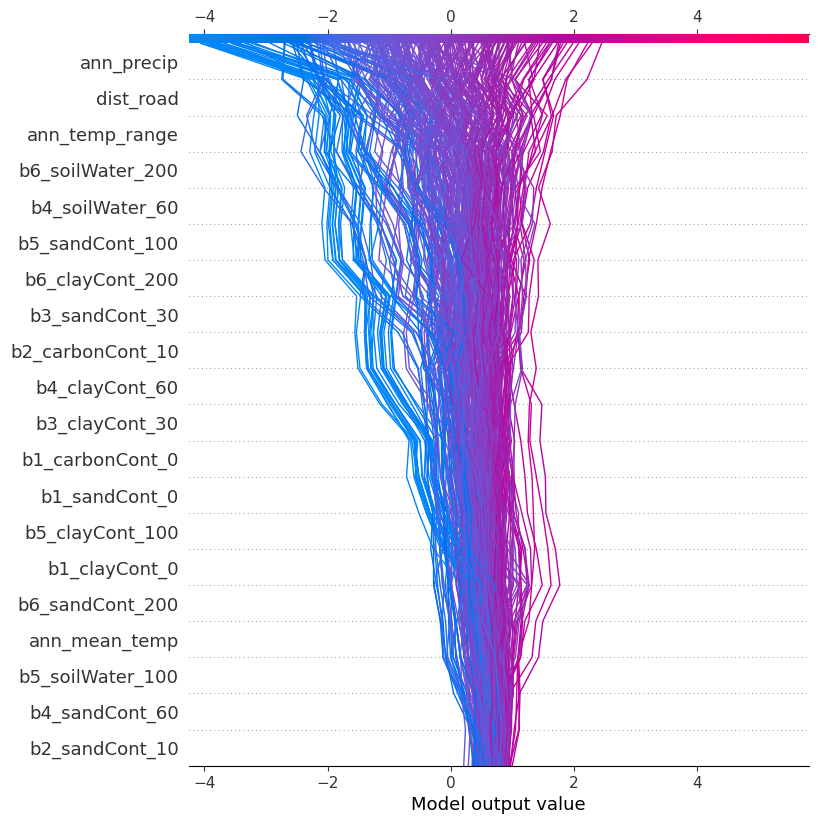

In [188]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns)

# Testing a Random Forests model

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       182
           1       0.21      0.50      0.30        18

    accuracy                           0.79       200
   macro avg       0.58      0.66      0.59       200
weighted avg       0.88      0.79      0.82       200



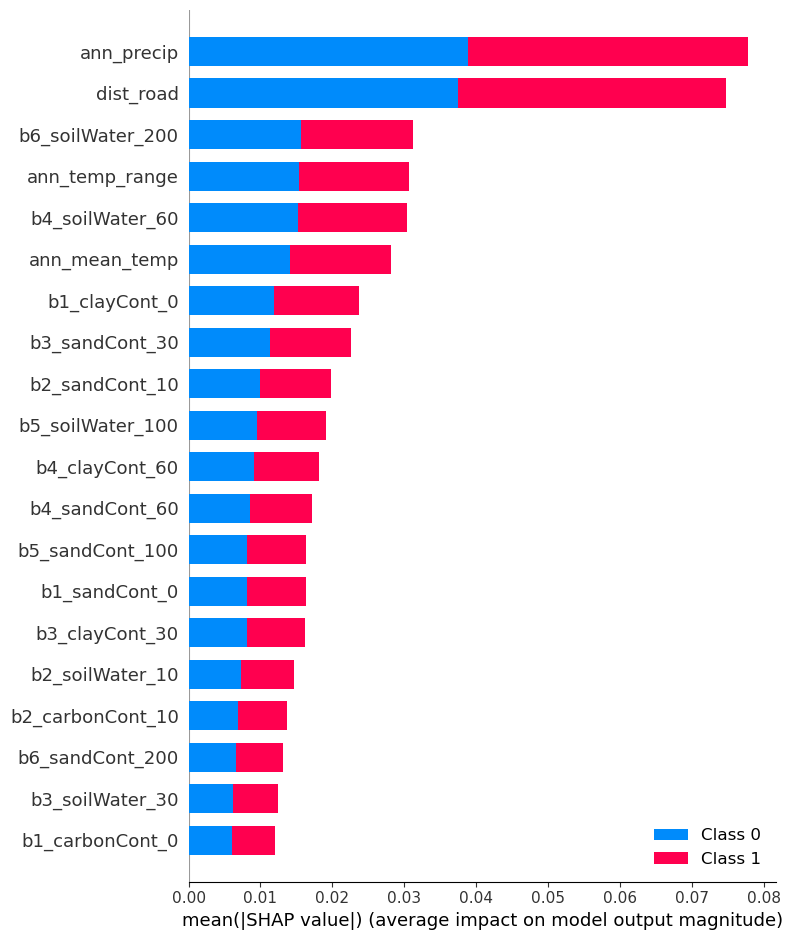

In [113]:
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

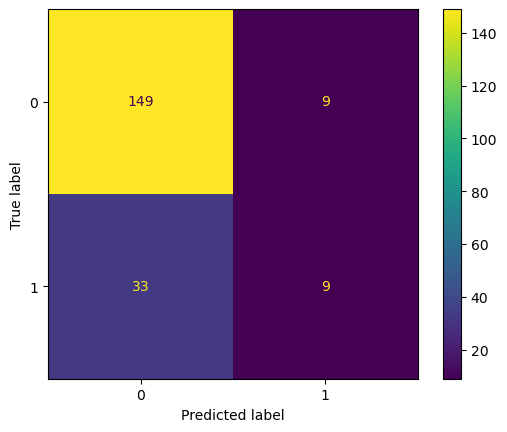

In [114]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)